### Monitor Data Quality Trends Over Time

**Task 1**: Create a Trends Analysis Report

**Objective**: Understand long-term data quality trends.

**Steps**:
1. Use historical data (or simulate data) to analyze how data quality has changed over time.
2. Calculate trends for the KPIs defined earlier using statistical measures or visual charts.
3. Write a report summarizing your findings, noting any persistent issues or improvements.

        Month  Accuracy (%)  Completeness (%)  Average Timeliness (days)
0  2024-06-30     93.490142         88.967849                   3.455617
1  2024-07-31     91.585207         80.346879                   4.110923
2  2024-08-31     93.943066         81.100329                   2.849006
3  2024-09-30     96.569090         85.750850                   4.375698
4  2024-10-31     91.297540         83.948676                   3.399361
5  2024-11-30     91.297589         89.256989                   3.708306
6  2024-12-31     96.737638         84.367904                   3.398293
7  2025-01-31     94.302304         82.350785                   5.852278
8  2025-02-28     90.591577         93.862595                   3.986503
9  2025-03-31     93.627680         87.096895                   2.942289
10 2025-04-30     90.609747         88.270113                   4.822545
11 2025-05-31     90.602811         82.301007                   2.779156


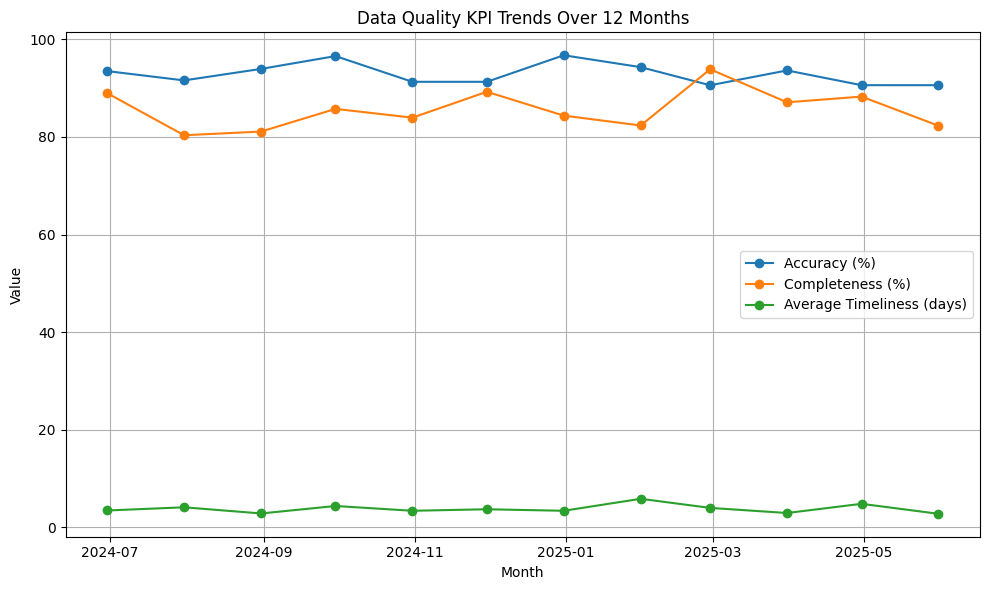

=== Data Quality Trends Analysis Report ===
- Accuracy (%):
  Trend Direction: decreasing
  Slope: -0.203
  R-squared: 0.108

- Completeness (%):
  Trend Direction: increasing
  Slope: 0.248
  R-squared: 0.050

- Average Timeliness (days):
  Trend Direction: increasing
  Slope: 0.017
  R-squared: 0.004



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

def simulate_kpi_data():
    """Simulate 12 months of KPI data for accuracy, completeness, and timeliness."""
    np.random.seed(42)
    months = pd.date_range(start='2024-06-01', periods=12, freq='M')

    accuracy = np.clip(np.random.normal(92, 3, 12), 85, 100)
    completeness = np.clip(np.random.normal(88, 4, 12), 75, 100)
    timeliness = np.clip(np.random.normal(4, 1, 12), 1, 7)

    df = pd.DataFrame({
        'Month': months,
        'Accuracy (%)': accuracy,
        'Completeness (%)': completeness,
        'Average Timeliness (days)': timeliness
    })
    return df

def analyze_trends(df):
    """Calculate slope and R-squared for each KPI to identify trends."""
    results = {}
    for col in ['Accuracy (%)', 'Completeness (%)', 'Average Timeliness (days)']:
        y = df[col].values
        x = np.arange(len(y))
        slope, intercept, r_value, p_value, std_err = linregress(x, y)
        results[col] = {
            'slope': slope,
            'r_squared': r_value**2,
            'trend': 'increasing' if slope > 0 else 'decreasing'
        }
    return results

def plot_kpis(df):
    """Plot KPI trends over time."""
    plt.figure(figsize=(10,6))
    plt.plot(df['Month'], df['Accuracy (%)'], marker='o', label='Accuracy (%)')
    plt.plot(df['Month'], df['Completeness (%)'], marker='o', label='Completeness (%)')
    plt.plot(df['Month'], df['Average Timeliness (days)'], marker='o', label='Average Timeliness (days)')
    plt.title("Data Quality KPI Trends Over 12 Months")
    plt.xlabel("Month")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def generate_report(trends):
    """Print a summary report of the KPI trends."""
    print("=== Data Quality Trends Analysis Report ===")
    for kpi, stats in trends.items():
        print(f"- {kpi}:")
        print(f"  Trend Direction: {stats['trend']}")
        print(f"  Slope: {stats['slope']:.3f}")
        print(f"  R-squared: {stats['r_squared']:.3f}\n")

def main():
    # Step 1: Simulate data
    df_kpis = simulate_kpi_data()
    print(df_kpis)

    # Step 2: Analyze trends
    trend_results = analyze_trends(df_kpis)

    # Step 3: Plot KPIs
    plot_kpis(df_kpis)

    # Step 4: Report findings
    generate_report(trend_results)

if __name__ == "__main__":
    main()


**Task 2**: Evaluate Continuous Improvement Measures

**Objective**: Implement strategic changes based on trend analysis.

**Steps**:
1. Identify patterns or recurring issues from your trend analysis report.
2. Propose three continuous improvement strategies to address these issues.
3. Plan how to implement these strategies and measure their effectiveness over the next cycle.

In [4]:
import dash
from dash import dcc, html
import pandas as pd
import numpy as np
import plotly.express as px

# Simulated KPI data for 12 months
def generate_sample_kpi_data():
    np.random.seed(42)
    months = pd.date_range(start='2024-06-01', periods=12, freq='M')
    data = {
        'Month': months,
        'Accuracy (%)': np.clip(np.random.normal(92, 3, 12), 85, 100),
        'Completeness (%)': np.clip(np.random.normal(88, 4, 12), 75, 100),
        'Average Timeliness (days)': np.clip(np.random.normal(4, 1, 12), 1, 7)
    }
    return pd.DataFrame(data)

df = generate_sample_kpi_data()

# Initialize Dash app
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Data Quality KPI Dashboard"),
    
    dcc.Dropdown(
        id='kpi-dropdown',
        options=[
            {'label': 'Accuracy (%)', 'value': 'Accuracy (%)'},
            {'label': 'Completeness (%)', 'value': 'Completeness (%)'},
            {'label': 'Average Timeliness (days)', 'value': 'Average Timeliness (days)'}
        ],
        value='Accuracy (%)',
        clearable=False,
        style={'width': '50%'}
    ),
    
    dcc.Graph(id='kpi-graph')
])

@app.callback(
    dash.dependencies.Output('kpi-graph', 'figure'),
    [dash.dependencies.Input('kpi-dropdown', 'value')]
)
def update_graph(selected_kpi):
    fig = px.line(
        df, 
        x='Month', 
        y=selected_kpi,
        markers=True,
        title=f"{selected_kpi} Over Time"
    )
    fig.update_layout(yaxis_title=selected_kpi)
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


ObsoleteAttributeException: app.run_server has been replaced by app.run